image-pairs
Task 1: Enhance image quality to deal with varying lighting conditions.
Task 2:Detect edges of vehicles and road markings to assess traffic patterns.
Task 3: Apply filters to reduce noise and improve the clarity of moving objects

Original Image


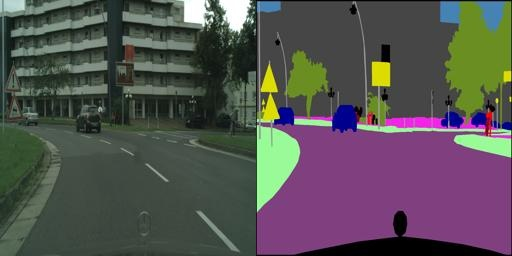

Task 1: Enhanced Lighting


Task 2: Detected Edges


Task 3: Noise Reduced


Original Image


Task 1: Enhanced Lighting


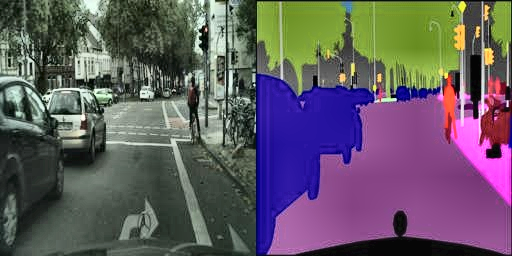

Task 2: Detected Edges


Task 3: Noise Reduced


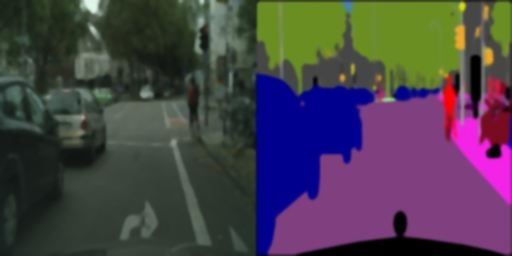

Original Image


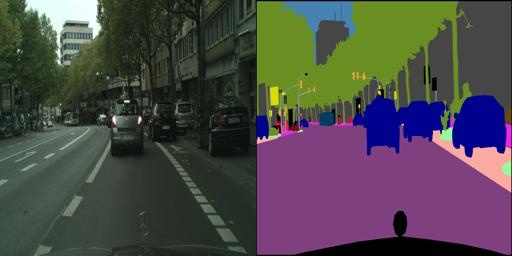

Task 1: Enhanced Lighting


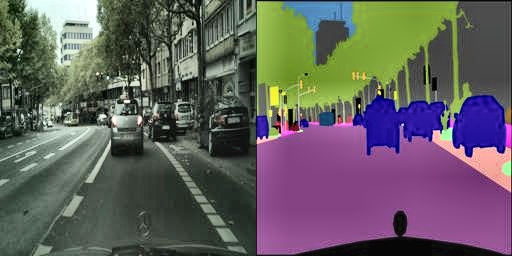

Task 2: Detected Edges


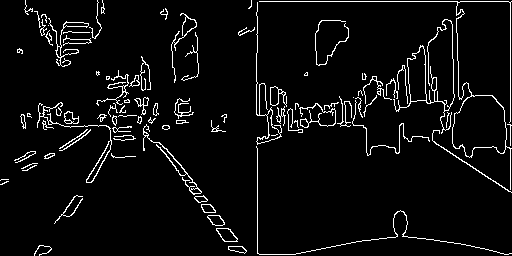

Task 3: Noise Reduced


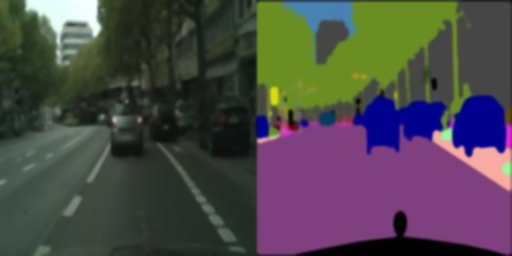

Original Image


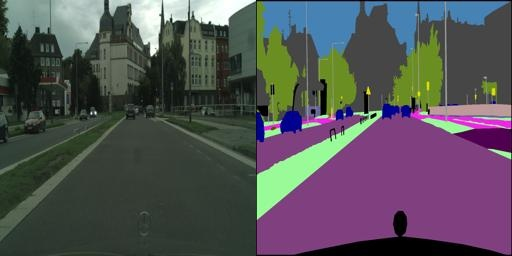

Task 1: Enhanced Lighting


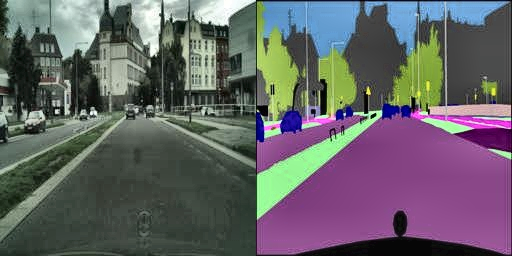

Task 2: Detected Edges


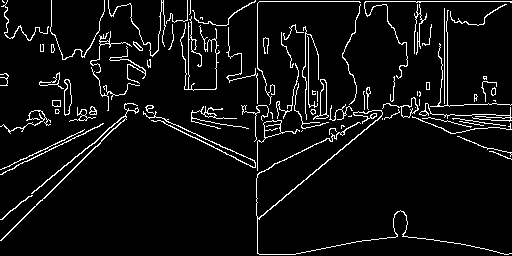

Task 3: Noise Reduced


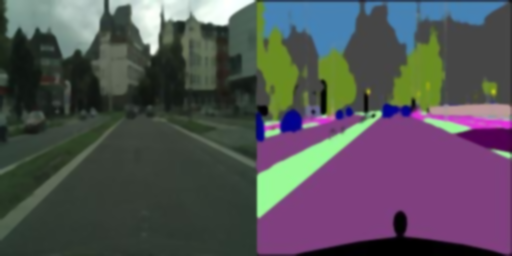

Original Image


Task 1: Enhanced Lighting


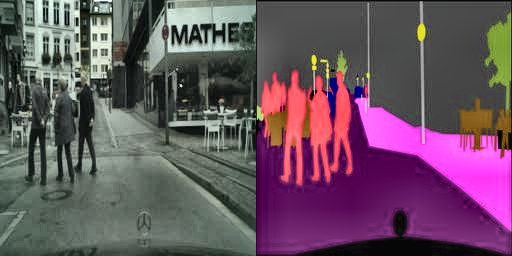

Task 2: Detected Edges


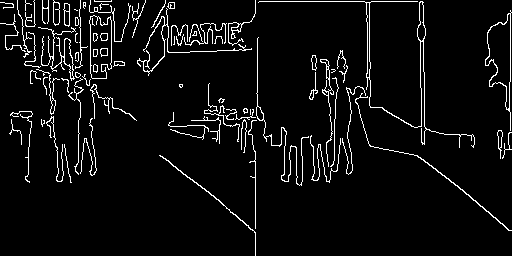

Task 3: Noise Reduced


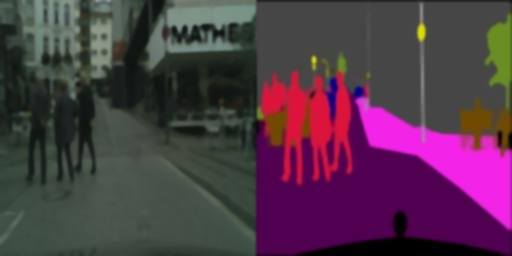

Original Image


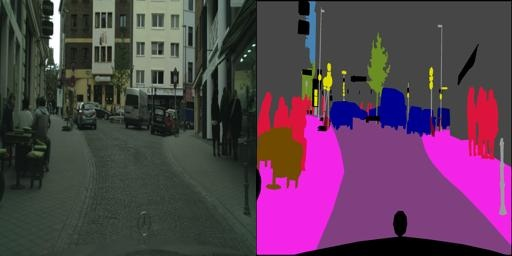

Task 1: Enhanced Lighting


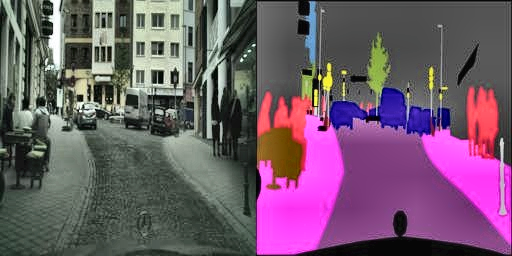

Task 2: Detected Edges


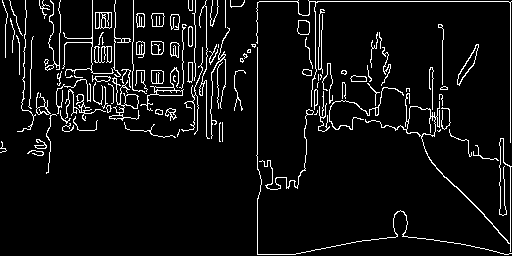

Task 3: Noise Reduced


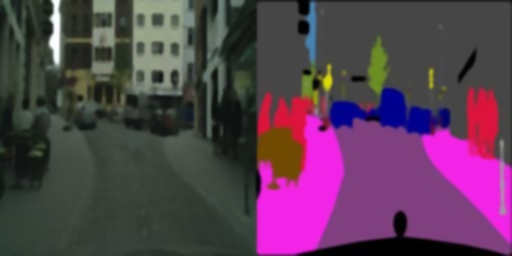

In [ ]:
import cv2
import os
import numpy as np
from PIL import Image
from google.colab.patches import cv2_imshow

# Task 1: Function to enhance image quality by adjusting lighting
def enhance_image_lighting(image_path):
    image = cv2.imread(image_path)
    lab = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)

    # Split the LAB image to different channels
    l_channel, a_channel, b_channel = cv2.split(lab)
    clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8, 8))
    cl = clahe.apply(l_channel)

    merged_lab = cv2.merge((cl, a_channel, b_channel))
    enhanced_image = cv2.cvtColor(merged_lab, cv2.COLOR_LAB2BGR)

    return enhanced_image

# Task 2: Function to detect edges for vehicle and road markings
def detect_edges(image_path):

    gray_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0)
    edges_detected = cv2.Canny(blurred_image, threshold1=50, threshold2=150)
    return edges_detected

# Task 3: Function to reduce noise and improve clarity of objects
def reduce_noise(image_path):
    image = cv2.imread(image_path)
    median_filtered_image = cv2.medianBlur(image, 5)
    gaussian_filtered_image = cv2.GaussianBlur(median_filtered_image, (5, 5), 0)

    return gaussian_filtered_image


dataset_path = '/content/drive/MyDrive/train'


for image_file in os.listdir(dataset_path):
    image_path = os.path.join(dataset_path, image_file)
    if not (image_file.endswith('.png') or image_file.endswith('.jpg') or image_file.endswith('.jpeg')):
        continue

    print("Original Image")
    cv2_imshow(cv2.imread(image_path))

    # Task 1: Enhance image quality
    enhanced_image = enhance_image_lighting(image_path)
    print("Task 1: Enhanced Lighting")
    cv2_imshow(enhanced_image)

    # Task 2: Edge detection
    edges_image = detect_edges(image_path)
    print("Task 2: Detected Edges")
    cv2_imshow(edges_image)

    # Task 3: Noise reduction
    noise_reduced_image = reduce_noise(image_path)
    print("Task 3: Noise Reduced")
    cv2_imshow(noise_reduced_image)

    cv2.waitKey(1000)
cv2.destroyAllWindows()
